In [1]:
import pandas as pd

# Load the car price dataset
df_car = pd.read_csv("C:\\Users\\arjav\\Downloads\\archive (1)\\car data.csv")

# Display basic information about the dataset
df_car.info(), df_car.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(None,
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Selling_type Transmission  Owner  
 0       Dealer       Manual      0  
 1       Dealer       Manual      0  
 2       Dealer       Manual      0  
 3       Dealer       Manual      0  
 4       Dealer       Manual      0  )

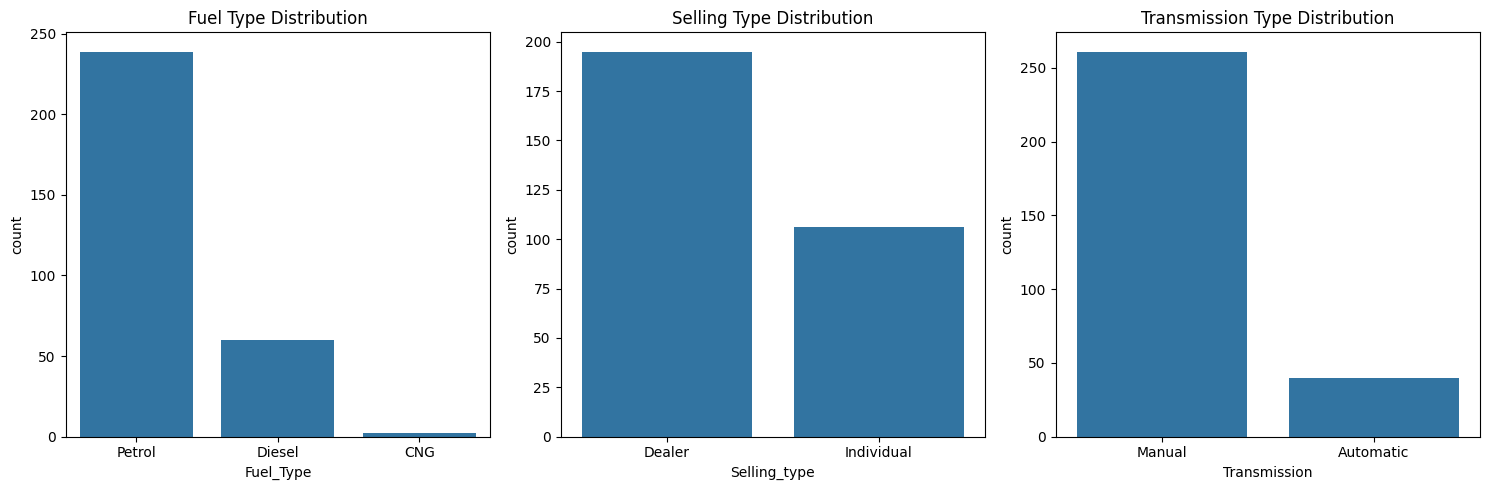

(Car_Name         0
 Year             0
 Selling_Price    0
 Present_Price    0
 Driven_kms       0
 Fuel_Type        0
 Selling_type     0
 Transmission     0
 Owner            0
 dtype: int64,
               Year  Selling_Price  Present_Price     Driven_kms       Owner
 count   301.000000     301.000000     301.000000     301.000000  301.000000
 mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
 std       2.891554       5.082812       8.642584   38886.883882    0.247915
 min    2003.000000       0.100000       0.320000     500.000000    0.000000
 25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
 50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
 75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
 max    2018.000000      35.000000      92.600000  500000.000000    3.000000)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df_car.isnull().sum()

# Summary statistics
summary_stats = df_car.describe()

# Count plots for categorical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df_car, x='Fuel_Type')
plt.title("Fuel Type Distribution")

plt.subplot(1, 3, 2)
sns.countplot(data=df_car, x='Selling_type')
plt.title("Selling Type Distribution")

plt.subplot(1, 3, 3)
sns.countplot(data=df_car, x='Transmission')
plt.title("Transmission Type Distribution")

plt.tight_layout()
plt.show()

missing_values, summary_stats


In [3]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for processing
df_model = df_car.copy()

# Drop 'Car_Name' since it's not numeric and too detailed
df_model.drop('Car_Name', axis=1, inplace=True)

# Create a new feature: car age
df_model['Car_Age'] = 2020 - df_model['Year']
df_model.drop('Year', axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
df_model['Fuel_Type'] = le.fit_transform(df_model['Fuel_Type'])
df_model['Selling_type'] = le.fit_transform(df_model['Selling_type'])
df_model['Transmission'] = le.fit_transform(df_model['Transmission'])

# Display first few rows of the processed data
df_model.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,6
1,4.75,9.54,43000,1,0,1,0,7
2,7.25,9.85,6900,2,0,1,0,3
3,2.85,4.15,5200,2,0,1,0,9
4,4.60,6.87,42450,1,0,1,0,6


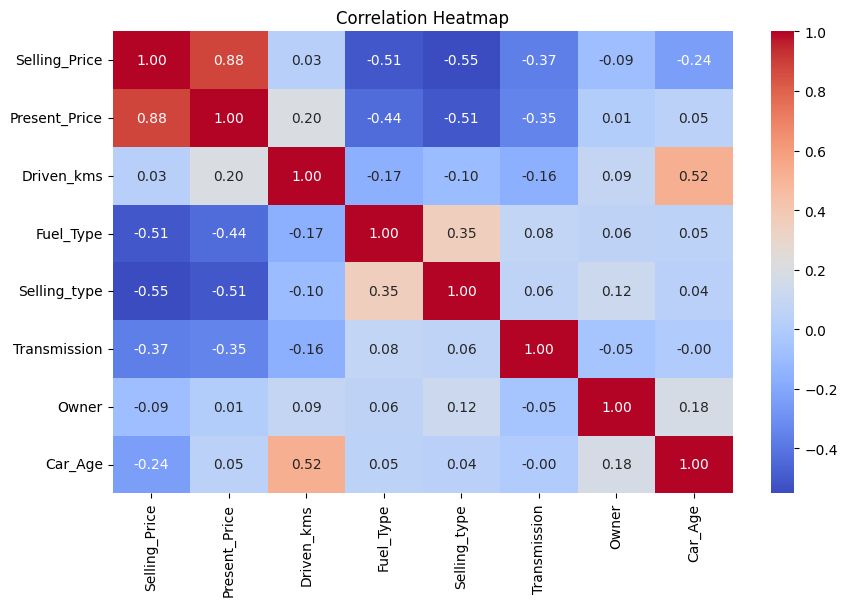

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


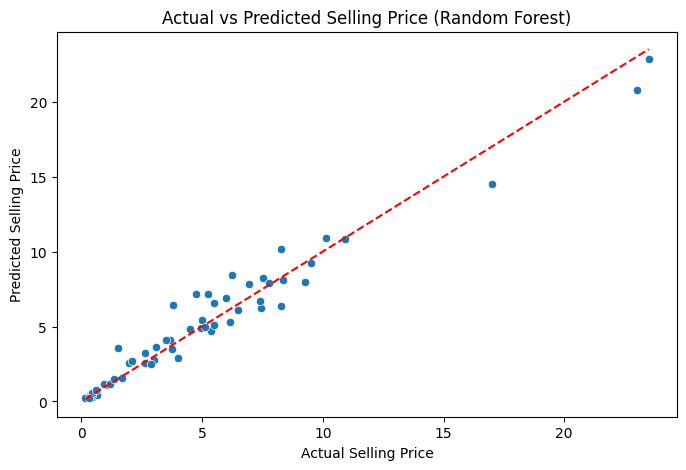

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()


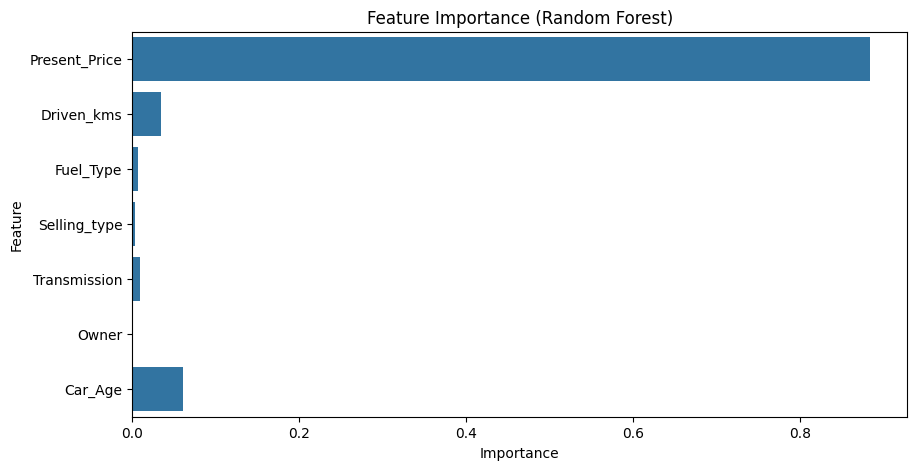

In [11]:
import pandas as pd
import numpy as np

# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


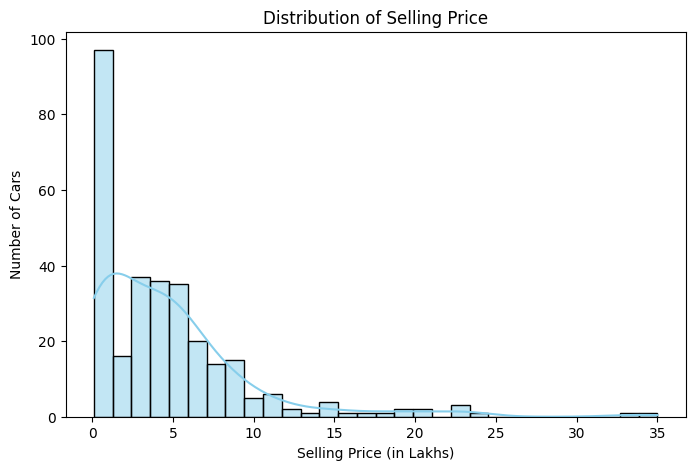

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (in Lakhs)")
plt.ylabel("Number of Cars")
plt.show()


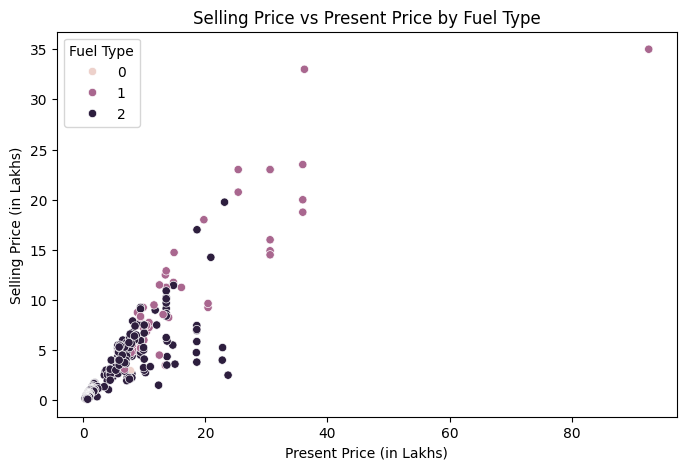

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title("Selling Price vs Present Price by Fuel Type")
plt.xlabel("Present Price (in Lakhs)")
plt.ylabel("Selling Price (in Lakhs)")
plt.legend(title='Fuel Type')
plt.show()


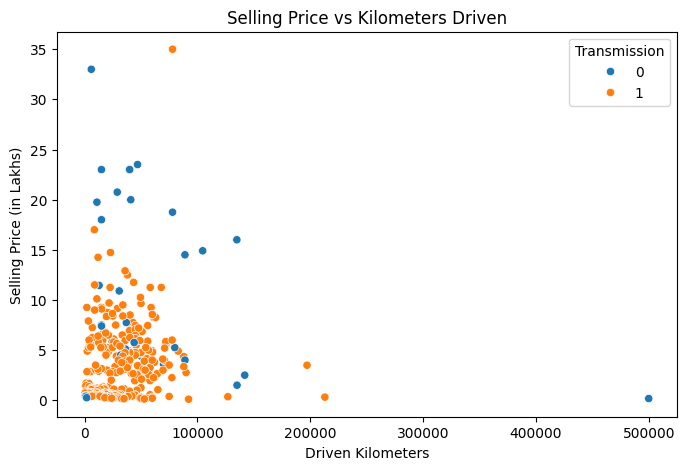

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Driven_kms', y='Selling_Price', hue='Transmission', data=df)
plt.title("Selling Price vs Kilometers Driven")
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price (in Lakhs)")
plt.legend(title='Transmission')
plt.show()


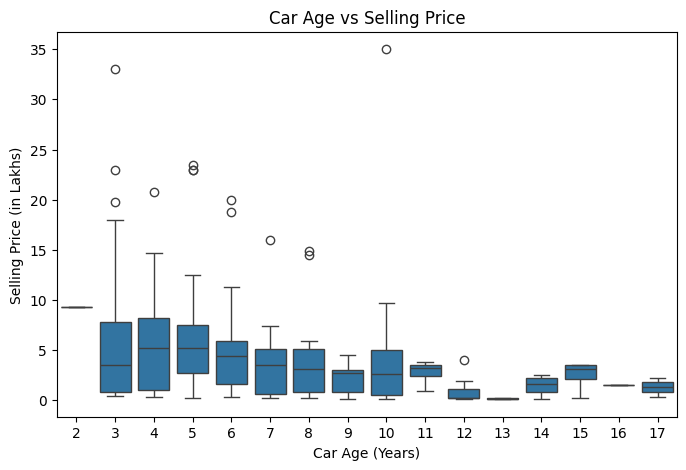

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Car_Age', y='Selling_Price', data=df)
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price (in Lakhs)")
plt.show()


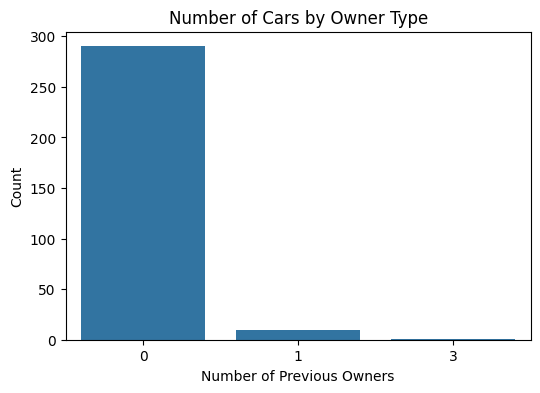

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Owner', data=df)
plt.title("Number of Cars by Owner Type")
plt.xlabel("Number of Previous Owners")
plt.ylabel("Count")
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("C:\\Users\\arjav\\Downloads\\archive (1)\\car data.csv")  # Replace with actual filename

# Drop 'Car_Name'
df.drop('Car_Name', axis=1, inplace=True)

# Create a new feature: Car_Age
df['Car_Age'] = 2020 - df['Year']
df.drop('Year', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

# View transformed data
df.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,6
1,4.75,9.54,43000,1,0,1,0,7
2,7.25,9.85,6900,2,0,1,0,3
3,2.85,4.15,5200,2,0,1,0,9
4,4.60,6.87,42450,1,0,1,0,6


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate models
print("🔹 Linear Regression")
print("R2 Score:", r2_score(y_test, lr_pred))
print("MAE:", mean_absolute_error(y_test, lr_pred))

print("\n🔹 Random Forest Regressor")
print("R2 Score:", r2_score(y_test, rf_pred))
print("MAE:", mean_absolute_error(y_test, rf_pred))


🔹 Linear Regression
R2 Score: 0.8466902419663829
MAE: 1.2219323621753841

🔹 Random Forest Regressor
R2 Score: 0.9592683769360726
MAE: 0.6389196721311476


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define features and target
X = df_model.drop('Selling_Price', axis=1)
y = df_model['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

(lr_r2, lr_mae), (rf_r2, rf_mae)


((0.8466902419663829, 1.2219323621753841),
 (0.9592683769360726, 0.6389196721311476))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🔹 Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

print("\n🔹 Random Forest Regressor")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


🔹 Linear Regression
R2 Score: 0.8466902419663829
MAE: 1.2219323621753841

🔹 Random Forest Regressor
R2 Score: 0.9592683769360726
MAE: 0.6389196721311476


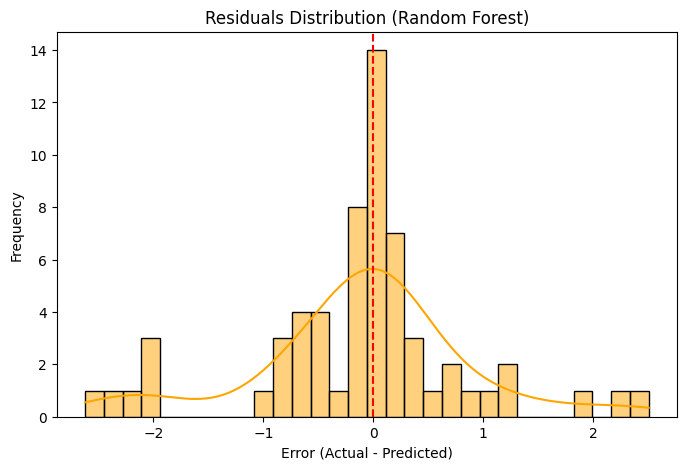

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color="orange", bins=30)
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()


C:\Users\arjav\AppData\Local\Temp\ipykernel_20204\3513075533.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='Blues')
C:\Users\arjav\AppData\Local\Temp\ipykernel_20204\3513075533.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_scores, palette='Reds')


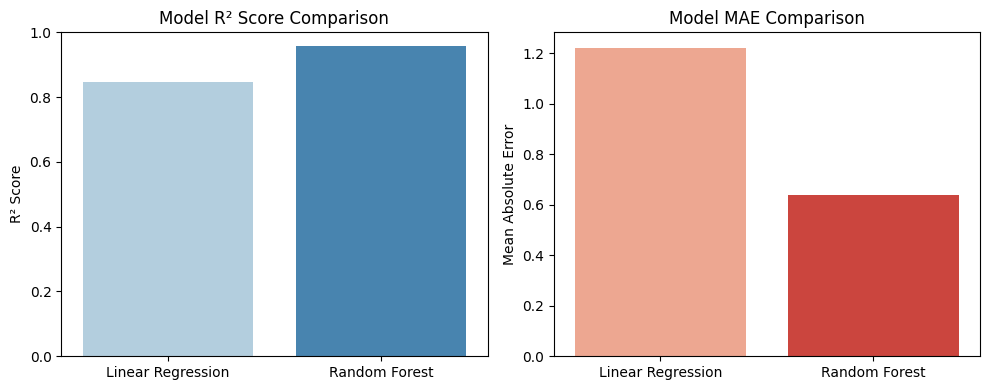

In [18]:
# Model performance
model_names = ['Linear Regression', 'Random Forest']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
mae_scores = [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)]

# Plot R² scores
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=r2_scores, palette='Blues')
plt.title("Model R² Score Comparison")
plt.ylim(0, 1)
plt.ylabel("R² Score")

# Plot MAE
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=mae_scores, palette='Reds')
plt.title("Model MAE Comparison")
plt.ylabel("Mean Absolute Error")

plt.tight_layout()
plt.show()
